In [1]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import warnings
warnings.simplefilter("ignore", UserWarning)

sys.path.insert(0, '../src/prep')
from preprocess import load_data, cleanup

## Load data & preprocess

In [2]:
file = '../src/data/LD2011_2014.txt'
data = load_data(file, hh_start=0, hh_end=-1, start='2012-01-01 00:15:00', stop="2014-01-01 00:00:00")
data = cleanup(data)

In [3]:
data["average"] = data.mean(axis=1)

In [8]:
data["week"] = np.array(pd.Series(data.index.to_pydatetime()).dt.isocalendar().week)
data["year"] = np.array(pd.Series(data.index.to_pydatetime()).dt.isocalendar().year)
data["day_of_week"] = np.array(pd.Series(data.index.to_pydatetime()).dt.isocalendar().day)
data["unique_week"] = data["week"] + 52 * (data["year"] - 2012)

In [9]:
data

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_013,MT_014,MT_016,MT_017,MT_018,MT_019,MT_020,MT_021,MT_022,MT_023,MT_025,MT_026,MT_027,MT_028,MT_029,MT_031,MT_034,MT_035,MT_036,MT_037,MT_038,MT_040,MT_042,MT_043,MT_044,MT_045,MT_046,MT_047,MT_048,MT_049,MT_050,MT_051,MT_052,MT_053,MT_054,MT_055,MT_056,MT_057,MT_058,MT_059,MT_060,MT_061,MT_062,MT_063,MT_064,MT_065,MT_066,MT_067,MT_068,MT_069,MT_070,MT_071,MT_072,MT_073,MT_074,MT_075,MT_076,MT_077,MT_078,MT_079,MT_080,MT_081,MT_082,MT_083,MT_084,MT_085,MT_086,MT_087,MT_088,MT_089,MT_090,MT_091,MT_093,MT_094,MT_095,MT_096,MT_097,MT_098,MT_099,MT_100,MT_101,MT_102,MT_103,MT_104,MT_105,MT_114,MT_118,MT_119,MT_123,MT_124,MT_125,MT_126,MT_128,MT_129,MT_130,MT_131,MT_132,MT_135,MT_136,MT_137,MT_138,MT_139,MT_140,MT_141,MT_142,MT_143,MT_145,MT_147,MT_148,MT_149,MT_150,MT_151,MT_153,MT_154,MT_155,MT_156,MT_157,MT_158,MT_159,MT_161,MT_162,MT_163,MT_164,MT_166,MT_168,MT_169,MT_171,MT_172,MT_174,MT_175,MT_176,MT_180,MT_182,MT_183,MT_187,MT_188,MT_189,MT_190,MT_191,MT_192,MT_193,MT_194,MT_195,MT_196,MT_197,MT_198,MT_199,MT_200,MT_201,MT_202,MT_203,MT_204,MT_205,MT_206,MT_207,MT_208,MT_209,MT_210,MT_211,MT_212,MT_213,MT_214,MT_215,MT_216,MT_217,MT_218,MT_219,MT_220,MT_221,MT_222,MT_223,MT_225,MT_226,MT_227,MT_228,MT_229,MT_230,MT_231,MT_232,MT_233,MT_234,MT_235,MT_236,MT_237,MT_238,MT_239,MT_240,MT_241,MT_242,MT_243,MT_244,MT_245,MT_246,MT_247,MT_248,MT_249,MT_250,MT_251,MT_252,MT_253,MT_254,MT_256,MT_257,MT_258,MT_259,MT_260,MT_261,MT_262,MT_263,MT_264,MT_265,MT_266,MT_267,MT_268,MT_269,MT_270,MT_271,MT_272,MT_273,MT_274,MT_275,MT_276,MT_277,MT_278,MT_279,MT_280,MT_281,MT_282,MT_283,MT_284,MT_285,MT_286,MT_287,MT_288,MT_290,MT_291,MT_292,MT_293,MT_294,MT_295,MT_296,MT_297,MT_298,MT_299,MT_300,MT_301,MT_302,MT_303,MT_304,MT_306,MT_307,MT_309,MT_310,MT_311,MT_312,MT_313,MT_314,MT_315,MT_316,MT_317,MT_318,MT_319,MT_320,MT_321,MT_323,MT_324,MT_325,MT_326,MT_327,MT_328,MT_329,MT_330,MT_331,MT_333,MT_334,MT_335,MT_336,MT_338,MT_339,MT_340,MT_341,MT_342,MT_343,MT_344,MT_345,MT_346,MT_347,MT_348,MT_349,MT_350,MT_351,MT_352,MT_353,MT_354,MT_355,MT_356,MT_357,MT_358,MT_359,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,average,week,year,day_of_week,unique_week
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:15:00,3.807107,22.759602,77.324066,136.178862,70.731707,351.190476,9.609949,279.461279,75.174825,87.096774,60.357675,45.605307,37.013401,56.947608,76.370171,309.904153,16.582915,55.506608,204.188482,29.887920,11.213720,289.719626,40.677966,35.322777,136.669875,63.243582,129.934211,27.234637,150.492264,10.327022,141.199226,117.801047,170.329670,64.803050,1409.090909,51.590106,72.758037,255.924171,38.665254,22.501308,1434.782609,266.903915,63.943162,57.098765,106.933020,93.525180,80.363382,53.435115,40.885860,171.288744,151.887621,40.785498,139.820114,99.585062,44.585987,1333.333333,94.642857,93.774626,238.866397,232.018561,291.139241,74.517631,65.856130,128.911139,39.738431,154.180239,106.653620,100.970874,39.784946,77.969649,46.066619,24.050633,149.732620,53.779070,124.629080,284.810127,195.402299,621.052632,147.757256,137.777778,370.370370,16.749380,108.739159,2.030457,10.106114,4.714510,8.695652,98.739496,224.052718,335.93750,13.315579,290.940767,354.029062,250.847458,215.841584,55.312158,175.496689,112.600536,160.638298,58.073654,110.047847,10.339734,24.859663,150.602410,134.786273,109.890110,354.166667,32.658393,22.245215,144.086022,35.866781,55.680963,473.551637,213.017751,6.160164,16.591252,164.667394,81.512109,2653.658537,334.525026,24.771838,32.435741,74.168798,126.967471,33.790919,144.444444,64.454148,907.780980,16.925134,26.120690,1830.2

# Plot seasonality

In [142]:
def plot_seasonality(times, matrix, first_week):
    xi = times   
    yi = np.linspace(1, np.shape(matrix)[1], np.shape(matrix)[1]).astype(int)
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
    
    ax.contour(xi, yi, np.transpose(matrix), levels=range(0, 50), linewidths=0., colors='k')
                
    cntr1 = ax.contourf(xi, yi, np.transpose(matrix), levels=np.shape(matrix)[1], cmap="RdBu_r")
    fig.colorbar(cntr1, ax=ax, shrink=1, label="Electricity Consumption [kW]")
    
    ax.set_title("Consumption")
    ax.set_ylabel("Week", fontsize=10)
    ax.set_xlabel("time", fontsize=10)
    
    # xticks
    weekday = ["Mo", "Tu", "We", "Thu", "Fri", "Sa", "Su"]
    week = [datetime(year=2000, month=1, day=3, minute=0) + timedelta(minutes=i*15) for i in range(quarters_in_week)]
    custom_ticks = range(0, quarters_in_week, 48)    
    timestamps = [f"{weekday[week[t].weekday()]}\n{week[t].hour}:{week[t].minute}" for t in custom_ticks]    
    ax.set_xticklabels(timestamps)
    ax.set_xticks(custom_ticks)
    
    # y_ticks
    r = [datetime.strptime(f"2012-W{i}" + "-1", "%Y-W%W-%w").month - 1 for i in range(1, 52+1)]
    months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "okt", "nov", "dec"]
    custom_yticks = range(1, 1+np.shape(matrix)[1], 2)   
    custom_ylabels = [months[r[(first_week+w-2)%52]] for w in custom_yticks]    
    ax.set_yticklabels(custom_ylabels)
    ax.set_yticks(custom_yticks)
    
    plt.show()

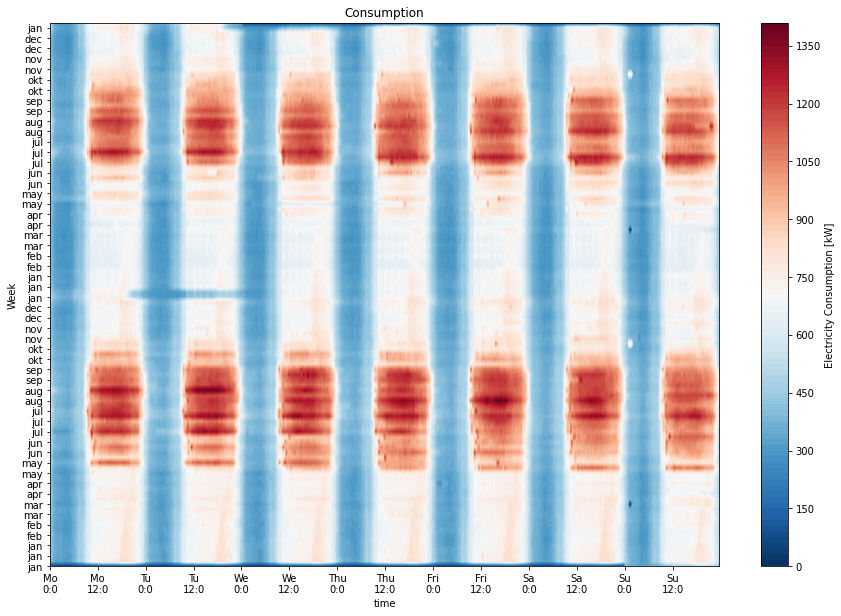

In [143]:
# number of quarters in a week
quarters_in_week = 4*24*7

# Weekly consumption matrix per specific year
matrix = []
for i in np.unique(data["unique_week"]):
    matrix += [np.array(data[data["unique_week"] == i]["average"])]

# fill zeros to the beginning and end of the weekly matrix if not complete
matrix[0] = np.append(np.zeros(quarters_in_week - len(matrix[0])), matrix[0])
matrix[-1] = np.append(matrix[-1], np.zeros(quarters_in_week - len(matrix[-1])))

# plot seasonality
times = range(quarters_in_week)
plot_seasonality(times, np.transpose(matrix), first_week = min(data_year["unique_week"]))